In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns#Understanding my variables

import project_functions as pf
df = pd.read_csv('housing.csv')


In [2]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df_cleaned = df

In [4]:
#drop columns with >40% null values
NA_val = df.isna().sum() 
def na_filter(na, threshold = .4): #only select variables that passees the threshold
    col_pass = []
    for i in na.keys():
        if na[i]/df_cleaned.shape[0]<threshold:
            col_pass.append(i)
    col_passdf_cleaned = df_cleaned[na_filter(NA_val)]
    return col_passdf_cleaned
df_cleaned.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
#remove rows with null values
df_cleaned = df_cleaned.dropna()
#remove duplicate locations 
df_cleaned = df_cleaned.drop_duplicates(subset=['latitude', 'longitude'])
df_cleaned = df_cleaned.reset_index()
df_cleaned = df_cleaned.drop(columns='index')
print("Rows vs Columns are "+ str(df_cleaned.shape))

In [ ]:
#visualize distributions to see outliers
countrooms = plt.hist(df_cleaned['total_rooms'], bins = 100)

In [ ]:
count_households = plt.hist(df_cleaned['households'], bins = 100)

In [ ]:
count_houseval = plt.hist(df_cleaned['median_house_value'], bins = 1000)


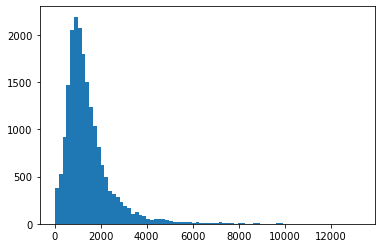

count    20640.000000
mean      1425.476744
std       1132.462122
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: population, dtype: float64

In [7]:
#remove outlier
df_cleaned = df_cleaned [df_cleaned['population']<15000]
df_cleaned = df_cleaned [df_cleaned['median_house_value']<500000]


In [ ]:
df_cleaned['population'].describe()

In [8]:
df_cleaned['median_house_value'].describe()

count    19642.000000
mean      1435.331891
std       1081.856767
min          3.000000
25%        796.000000
50%       1179.000000
75%       1746.000000
max      13251.000000
Name: population, dtype: float64